# **Project: European Soccer Data Analysis in seasons 2008 : 2016**

# **Table of Contents**
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# **Introduction**

> In this project i gathered data from **[kaggle](https://www.kaggle.com/hugomathien/soccer)** and it is mysql data file that has data of:
>
> +25,000 matches.\
> +10,000 players.\
> 11 European Countries with their lead championship.\
> Seasons 2008 to 2016.\
> Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates.
>
>
> And in this project we will discover these data to help us answer some curious questions. personally, I am interested in discovering them.
>
>

> ##### **Questions I will focus on in this analysis:**
>1. What are the Leagues with maximum number of goals per year ?
>2. What are the best teams with the highest rate of winning matches?
>3. What helps teams to win? In other words, what distinguishes the best teams ?
>4. How teams' interest in defence has changed ?
>5. Who are the best players of each year?
>6. What features affects the overall rating of players?







In [ ]:
# importing lybraries used in the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
# **Data Wrangling**

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

con = sqlite3.connect('database.sqlite')
country = pd.read_sql_query('SELECT * FROM Country', con)
league  = pd.read_sql_query('SELECT * FROM League', con)
match   = pd.read_sql_query('SELECT * FROM Match', con)
player  = pd.read_sql_query('SELECT * FROM Player', con)
player_att = pd.read_sql_query('SELECT * FROM Player_Attributes', con)
team = pd.read_sql_query('SELECT * FROM Team', con)
team_att = pd.read_sql_query('SELECT * FROM Team_Attributes', con)

# to display all columns of the DataFrame.
pd.set_option("display.max_columns", None)


## **Data Assessing** :

>#### country dataset :

In [ ]:
print(country.head(), '\n\n')

print('null values: ', country.id.isnull().sum())
print('duplicated data: ', country.id.duplicated().sum())

In [ ]:
# view on the country table
country.info()

In [ ]:
# trying to know what are the unique values: 
if match.id.duplicated().sum() == 0: 
    print('[ id ] column is unique')
else: 
    print('[ id ] column is NOT unique.')

> #### league dataset :


In [ ]:
# exploring league dataset.
print(league.head(), '\n\n')

print('null values: ', league.id.isnull().sum())
print('duplicated data: ', league.id.duplicated().sum())

In [ ]:
# view on league dataset.
league.info()

In [ ]:
# trying to know what are the unique values: 
if  league.id.duplicated().sum() == 0: 
    print('[ id ] column is unique')
else: 
    print('[ id ] column is NOT unique.')

> #### match dataset :
    


In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 6)

# exploring data of the matches to check if there is duplicates, nan values.
print(match.head(), '\n\n')

print('null values: ', match.isnull().sum().sum())
print('duplicated data: ', match.duplicated().sum())

In [ ]:
match.columns

In [ ]:
# trying to know what are the unique values: 
if match.match_api_id.duplicated().sum() == 0: 
    print('[ match_api_id ] column is unique')
else: 
    print('[ match_api_id ] column is NOT unique.')

> #### player dataset :

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 5)

# exploring match dataset.
print(player.head(), '\n\n')

print('null values: ', player.player_api_id.isnull().sum())
print('duplicated data: ', player.player_api_id.duplicated().sum())

In [ ]:
player.info()

In [ ]:
# trying to know what are the unique values: 
if player.player_api_id.duplicated().sum() == 0: 
    print('[ player_api_id ] column is unique')
else: 
    print('[ player_api_id ] column is NOT unique.')

> #### player_attributes dataset : 

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 5)

# exploring data of the matches to check if there is duplicates, nan values.
print(player_att.head(), '\n\n')

print('null values: ', player_att.isnull().sum().sum())
print('duplicated data: ', player_att.duplicated().sum())    

In [ ]:
player_att.info()

> #### team dataset :

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", None)

# exploring data of the matches to check if there is duplicates, nan values.
print(team.head(), '\n\n')

print('null values: ', team.isnull().sum().sum())
print('duplicated data: ', team.duplicated().sum())    

In [ ]:
team.info()

> #### team_attributes dataset :

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 0)

# exploring data of the matches to check if there is duplicates, nan values.
print(team_att.head(), '\n\n')

print('null values: ', team_att.isnull().sum().sum())
print('duplicated data: ', team_att.duplicated().sum())    

In [ ]:
# trying to know what are the unique values: 
if team.team_api_id.duplicated().sum() == 0: 
    print('[ team_api_id ] column is unique')
else: 
    print('[ team_api_id ] column is NOT unique.')

## Conclusion Of Assessing

##### Country dataset conclusion: 
> 11 rows, 2 columns.\
> No null values.  
> No duplicated rows.

> [ **id** ] column is unique ... we can use it in relations between tables.


##### league dataset conclusion: 
> 11 rows, 3 columns.\
> No null values.  
> No duplicated rows.


> [ **id** ] column is unique.

##### match dataset conclusion: 
> 25979 rows, 115 columns.\
> null values => 407395. ---- but all of them in columns we will not use.\
> duplicated rows => 0


>**Need to be cleaned**

> **[match_api_id]** is unique.
    


##### player dataset conclusion: 
> 11060 rows, 7 columns.\
> null values => 0\
> duplicated rows => 0

> **Need to change dtypes**

> [ **player_api_id** ] is unique

##### player_att dataset conclusion: 
> 183978 rows, 42 columns.\
> null values => 47301\
> duplicated rows => 0

> **Need to be cleaned**

> No need for unique values as each player has more than one statistics all over the years.

##### team dataset conclusion: 
> 299 rows, 5 columns.\
> null values => 11 ---- but all of them from one column 'team_fifa_api_id'. 
>
> duplicated rows => 0


> **Need to be cleaned**

> [ **team_api_id** ] is unique

##### team_att dataset conclusion: 
> 1458 rows, 25 columns.\
> null values => 969 --- from one column 'buildUpPlayDribbling' so i prefer to delete it.
>
> duplicated rows => 0


> **Need to be cleaned**

> No need for unique values as each team has more than one statistics all over the years.




## **Data Cleaning**

#### Cleaning 'match' dataset :

In [ ]:
match.info()

In [ ]:
# get rid of columns that have null values and we will not use them: 
match = match.loc[:, :'away_team_goal']

In [ ]:
# insuring that the data has no null now. 
print('number of null values now: ', match.isnull().sum().sum())

In [ ]:
# checking all dtyeps are good or not.
match.info()

In [ ]:
# the country_id is the same for the league_id
(match.country_id == match.league_id).all()

In [ ]:
# so we will drop the country_id
match.drop(columns=['country_id'], inplace=True)

In [ ]:
# converting data in the 'date' column from object => datetime.
match['date'] = pd.to_datetime(match['date'])

In [ ]:
# making a new column named 'Year' to use it to group data by the year or the season.
match['Year'] = pd.DatetimeIndex(match['date']).year

In [ ]:
match.Year.value_counts().plot(kind='bar', figsize=(8, 8))
plt.ylabel('Number of matches', fontsize=14)

> Notice the data should be consistant with all dataframe, if we check the data in [team_att] dataframe\
> we will found that there is no data for 2008, 2009, 2015 teams.

> #### So our analysis of matches and teams will be by calculating the mean in the most cases.


In [ ]:
match.head(2)

#### Cleaning 'player' dataset :

In [ ]:
player.info()

In [ ]:
# we need to change data type of birthday column form object to date time.
player['birthday'] = pd.to_datetime(player['birthday'])
player.info()

##### Distribution of ages og the players:

In [ ]:
# adding a new column named 'Age' to show the distribution of the ages.
player['Age'] = pd.datetime.now().year - pd.DatetimeIndex(player['birthday']).year

In [ ]:
ide = sorted(player.Age.value_counts().index)
Data = player.Age.value_counts()[ide]
plt.subplots(figsize=(10, 8))
plt.stem(Data.index, Data.values, use_line_collection=True)
plt.ylim(0, 1000)
plt.xticks(fontsize=13)
plt.xlabel('Age', fontsize=20)
plt.title("Distribution of player's ages", fontsize= 22)
plt.ylabel('No of players', fontsize=20)


The figure shows that the age curve is a normal distribution curve, so the average age of the players is 35 years.

#### Cleaning 'player_att' dataset :

In [ ]:
player_att.info()

In [ ]:
# we will drop all players who has null values in their attributes.
player_att.dropna(inplace=True)

In [ ]:
# check if there is null values: 
print('number of null values now: ', player_att.isnull().any().sum());

In [ ]:
# we need to change data type of [date] column form object to date time.
player_att['date'] = pd.to_datetime(player_att['date'])

# and making a column [Year] of data.
player_att['Year'] = pd.DatetimeIndex(player_att['date']).year
player_att.info()

#### Cleaning 'team' dataset :

In [ ]:
team.info()

In [ ]:
# droping all rows that contain null values (11 value)
team.dropna(inplace=True)

In [ ]:
# check if there is null values: 
print('number of null values now: ', team.isnull().any().sum());

#### Cleaning 'team_att' dataset :

In [ ]:
team_att.info()

In [ ]:
# i'd like to drop the column itself 'which contains all null values' as i wont use it.
team_att.drop(columns = 'buildUpPlayDribbling', inplace=True)

In [ ]:
# cheacking for other null values:
print('Number of null values now: ', team_att.isnull().sum().sum())

In [ ]:
team_att.info()

In [ ]:
# changing the dtype of the column [date] from object to date time.
# and making a column with the name 'Year'.

team_att['date'] = pd.to_datetime(team_att['date'])
team_att['Year'] = pd.DatetimeIndex(team_att['date']).year

#### Merging "Player" with "Player_att" datasets, to put players' information with his stats into one dataset "PlayerData".

In [ ]:
print('Columns of [player] are:', '\n' , list(player.columns), '\n');
print('Columns of [player_att] are:', '\n' , list(player_att.columns), '\n');

In [ ]:
PlayerData = pd.merge(left=player, right=player_att, on=['player_api_id'])
PlayerData.head(2)

In [ ]:
# droping not important columns in the new DataFrame.
# deleting the [player] and [player_att] dataframes, as there is no need for them now.

try:
    PlayerData.drop(columns=['id_x', 'id_y', 'player_api_id', 'player_fifa_api_id_x', 'player_fifa_api_id_y', 'birthday'], inplace=True)
    del player
    del player_att
except:
    print('already these columns were dropped!')
    


#### Merging "team" with "team_att" datasets, to put teams' information with their stats into one dataset "TeamData".

In [ ]:
print('Columns of [team] are:', '\n' , list(team.columns), '\n');
print('Columns of [team_att] are:', '\n' , list(team_att.columns), '\n');

In [ ]:
TeamData = pd.merge(left=team, right=team_att, on=['team_api_id'])
TeamData.head(2)

In [ ]:
# droping not important columns in the new DataFrame.
# deleting the team and team_att datasets as no need for them now.
try:
    TeamData.drop(columns=['id_x', 'date', 'id_y', 'team_fifa_api_id_x', 'team_fifa_api_id_y'], inplace=True)
    del team
    del team_att
except:
    print('already these columns were dropped!')

In [ ]:
TeamData.head(2)

#### Merging "league" with "country" datasets, to put them into one dataset "LeagueCoun".

In [ ]:
print('Columns of [league] are:', '\n' , list(league.columns), '\n');
print('Columns of [country] are:', '\n' , list(country.columns), '\n');

In [ ]:
LeagueCoun = pd.merge(left=league, right=country, left_on='country_id', right_on='id')
LeagueCoun.head()

In [ ]:
# droping not important columns in the new DataFrame.
# deleting the [league] and [country] datasets as no need for them now.

# we notice that all country_ids is the same for their league_ids 
try:
    LeagueCoun.drop(columns=['id_y', 'country_id'], inplace=True)
    del league
    del country
except:
    print('already these columns were dropped!')

In [ ]:
# renaming columns 
LeagueCoun.rename(columns={'id_x': 'league_id', 'name_x': 'league_name', 'name_y': 'country_name'}, inplace=True)

In [ ]:
LeagueCoun

#### Merging "LeagueCoun" with "match" datasets, to put matchs' information with their leagues into one dataset "Match_League_Country".

In [ ]:
print('Columns of [LeagueCoun] are:', '\n' , list(LeagueCoun.columns), '\n');
print('Columns of [match] are:', '\n' , list(match.columns), '\n');

In [ ]:
Match_League_Country = pd.merge(left=match, right=LeagueCoun, on='league_id')
Match_League_Country.head(2)

In [ ]:
# droping not important columns in the new DataFrame.
# deleting the [LeagueCoun] as we don't need it now after constructing [Match_League_Country]

# we notice that all country_ids is the same for their league_ids 
try:
    Match_League_Country.drop(columns=['id', 'league_id'], inplace=True)
    del LeagueCoun
except:
    print('already these columns were dropped!')


In [ ]:
# making a new column [Total_goals].
Match_League_Country['Total_goals'] = Match_League_Country.home_team_goal + Match_League_Country.away_team_goal

In [ ]:
Match_League_Country.head(2)

### Our final data tables which we have and will use: 

In [ ]:
PlayerData.head(1)

In [ ]:
TeamData.head(1)

In [ ]:
Match_League_Country.head(1)

<a id='eda'></a>
# **Exploratory Data Analysis**



### 1) What are the Leagues with maximum number of goals per year ?

In [ ]:
leagus_total_goals = Match_League_Country.groupby(['Year', 'league_name']).sum()
df = {}
years = np.arange(2008, 2017)

# making a dicitonary saves the most 2 leagues has goals in each ear.
for i in range(len(years)):
    df[years[i]] = leagus_total_goals.query(f'Year == {years[i]}')['Total_goals'].nlargest(2)



fig, ax = plt.subplots(figsize=(12, 12))
x = 0
# plotting bars
for year in years:
    plt.bar(np.arange(0, 8, 4) + x ,df[year].values)
    
    # typing each maximum goal for each league
    plt.text(0 + x, df[year].values[0] + 7 , df[year].values[0], ha='center', va='bottom' , fontsize=12,  color='r', rotation='10')
    plt.text(4 + x, df[year].values[1] - 2  ,df[year].values[1], ha='center', va='bottom',fontsize=12, color='b', rotation='10')

    # splitting betweeen the years
    x += 10


# getting the names of the leagues to use it in plt.xlabels of plt.set_xticks.
names = []
for i in range(len(years)):
    names.append(df[years[i]].index[0][1])
    names.append(df[years[i]].index[1][1])

# typing on the x-axis
ax.set_ylabel('No of goals', fontsize=17)
ax.set_title('Leagues with maximum number of goals per year', fontsize=22)
ax.set_xticks(np.arange(0, 180/2, 5) - 0.6  ,names, rotation=90,minor=False,ha='left', fontsize=15)

ax.legend()
plt.xlim(-5, 90)
plt.ylim(-5, 1300)
plt.legend(np.arange(2008, 2017), loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, prop={'size': 17})


> ##### We note that the 3 most popular leagues in the list of the most scoring leagues are
> 1. **Spain LIGA BBVA.**
> 2. **England Premier League.**
> 3. Italy Serie A.

> ##### This explains why the Spanish and English leagues are the most watched in the world.

> ##### But to be fair, the number of matches varies from one league to another, so let's calculate the **average goals per match** in the leagues over the years:

In [ ]:
leagus_avg_goals = Match_League_Country.groupby(['Year', 'league_name']).mean()
df = {}
years = np.arange(2008, 2017)

# making a dicitonary saves the most 2 leagues has goals in each ear.
for i in range(len(years)):
    df[years[i]] = leagus_avg_goals.query(f'Year == {years[i]}')['Total_goals'].nlargest(2)



fig, ax = plt.subplots(figsize=(12, 12))
x = 0
# plotting bars
for year in years:
    plt.bar(np.arange(0, 8, 4) + x ,df[year].values)
    
    # typing each maximum goal for each league
    plt.text(0 + x, df[year].values[0] , round(df[year].values[0], 2), ha='center', va='bottom' , fontsize=12,  color='r', rotation='10')
    plt.text(4 + x, df[year].values[1] , round(df[year].values[1], 2), ha='center', va='bottom',fontsize=12, color='b', rotation='10')

    # splitting betweeen the years
    x += 10


# getting the names of the leagues to use it in plt.xlabels of plt.set_xticks.
names = []
for i in range(len(years)):
    names.append(df[years[i]].index[0][1])
    names.append(df[years[i]].index[1][1])

# typing on the x-axis
ax.set_ylabel('Avg goals / match', fontsize=17)
ax.set_title('Leagues with max avg goals per match in each year', fontsize=22)
ax.set_xticks(np.arange(0, 180/2, 5) - 0.6  ,names, rotation=90,minor=False,ha='left', fontsize=15)

ax.legend()
plt.xlim(-5, 90)
plt.ylim(0, 4)
plt.legend(np.arange(2008, 2017), loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, prop={'size': 13})


> ### As we expected, the number of matches varies from one league to another, and this shows that the leagues that have the highest average number of goals in each match are:
> 1. **Netherlands Eredivisie.**
> 2. **Switzerland Super League.**
> 3. Germany 1. Bundesliga.
>


### 2) What are the best teams with the highest rate of winning matches?

from the last idea we will take the mean not the max .. we will get the best teams that has\
highest rate of winning matches.

In [776]:
v = []

temp = list(Match_League_Country.query('home_team_goal > away_team_goal')['home_team_api_id'])  # get winners in home matches.

temp2 = list((Match_League_Country.query('home_team_goal < away_team_goal')['away_team_api_id']))      # get winners in away matches.

for i in temp:
    v.append(i)

for i in temp2:
    v.append(i)
    
# building a dictionary of thease teams ids and their count of wins:
vectory = {}
for team in v:
    vectory[team] = vectory.get(team, 0) + 1

# getting all teams ids from the dictionary of vectory.
teams_id = list(list(vectory.keys()))

# getting all number of wins for all winning teams.
NoOfwins = list(list(vectory.values()))

# getting the number of matches for each team.
NoOfMatches = []
for id in teams_id:
    NoOfMatches.append(match.query(f'home_team_api_id == {id} or away_team_api_id == {id}').shape[0])
        
df = pd.DataFrame(list(zip(NoOfwins, NoOfMatches)),
               columns =['wins', 'no_matches'], index=teams_id)  


df['WPM'] = df.wins / df.no_matches # adding a column win per match [WPM]



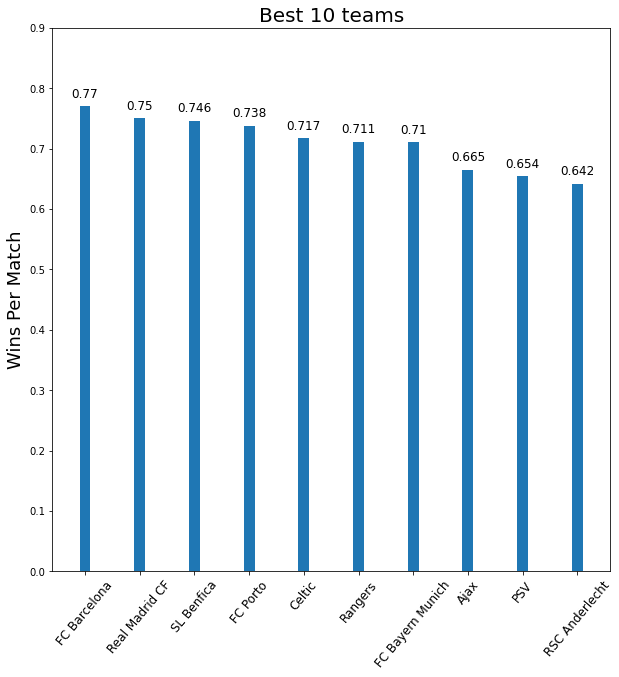

In [781]:


# Best teams with number of wins per match they played.
Best_teams = df.WPM.nlargest(10)

Best_10_Data = TeamData[TeamData['team_api_id'].isin(Best_teams.index)]       # a data frame with the data of all the 10 best teams.


Best10_no_names = []
Best10_no_wins = []
for i in range(len(Best_teams)):
    Best10_no_names.append(TeamData.query(f'team_api_id ==  {Best_teams.index[i]}')['team_long_name'].values[0])
    Best10_no_wins.append(round(Best_teams.values[i], 3))

ide = np.arange(0, len(Best10_no_names) * 5, 5)
plt.rcParams["figure.figsize"] = (10, 10)
plt.bar(ide, Best10_no_wins, width=1)
plt.xticks(ide, Best10_no_names, rotation=50, fontsize=12)
plt.ylabel('Wins Per Match', fontsize=18)
plt.title('Best 10 teams', fontsize=20)
plt.xlim(-3, 48)
plt.ylim(0, 0.9)

for i in range(10):
    plt.text(i*5, Best10_no_wins[i] + 0.01, Best10_no_wins[i] , ha='center', va='bottom', fontsize = 12 )



### 3) What helps the best teams win? In other words, what sets the best teams apart from the rest?

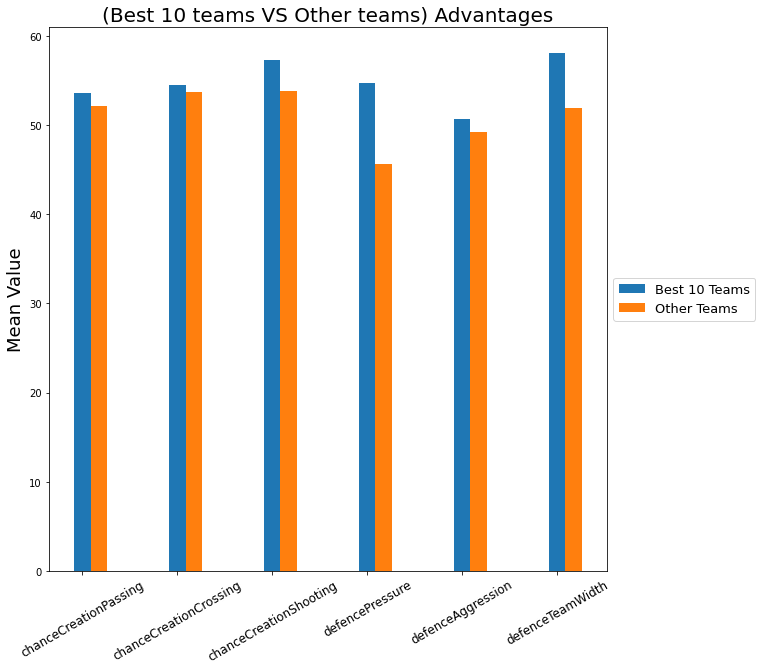

In [782]:
att = ['chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth']
Best_teams_data = TeamData.query(f'team_api_id in {list(Best_teams.index)}')

best_teams = Best_teams_data[att].mean()                                                 # Data of the best 10 teams 
all_teams = TeamData.query(f'team_api_id not in {list(Best_teams.index)}')[att].mean()   # Data of other teams


ide = np.arange(0, 42, 7)
plt.rcParams["figure.figsize"] = (10,10)
plt.bar(ide, best_teams, width=1.2)
plt.bar(ide+1.2, all_teams, width=1.2)
plt.xticks(ide, att, rotation=390, fontsize=12)
plt.ylabel('Mean Value', fontsize=18)
plt.title('(Best 10 teams VS Other teams) Advantages', fontsize=20)
plt.legend(['Best 10 Teams', 'Other Teams'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, prop={'size': 13})


> We notice that **best tams** give more attention than **other teams** to:
> 1. Creation of passing.
> 2. Creation of crossing.
> 3. Shotting.
> 4. Having a good defence in general.


> So, we will take the defence as example and see how the focus on defence from the teams all over the years.

### 3) How teams' interest in defence has changed ?

In [783]:
# checking for the years avilable in our dataset.
Best_10_Data.Year.value_counts()

2010    10
2011    10
2012    10
2013    10
2014    10
2015    10
Name: Year, dtype: int64

Our analysis in this topic will not include 2008, 2009, 2016

In [ ]:
Defence_data = Best_10_Data.groupby('Year').mean()[['defencePressure', 'defenceAggression', 'defenceTeamWidth']]
Defence_data['total defence avg'] = (Defence_data['defencePressure'] + Defence_data['defenceAggression'] + Defence_data['defenceTeamWidth']) / 3
Defence_data

Defence_data.plot.bar(figsize=(8, 8), width=0.4)

plt.ylabel("Defense Average", fontsize=15)
plt.xlabel(' ')
plt.xticks(fontsize=18, rotation='360')
plt.title('Level of defense of the best teams during years ', fontsize=16)
plt.ylim(0, 70)
plt.xlim(-.5, 5.5)
for i in range(6):
    plt.text(i + 0.3, Defence_data.iloc[i]['total defence avg']+.9 , round(Defence_data.iloc[i]['total defence avg'], 2) , ha='center', va='bottom', fontsize = 10 )
    
plt.legend(['defencePressure', 'defenceAggression', 'defenceTeamWidth', 'total defence avg'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, prop={'size': 13})



During 2010, the interest of the top 10 teams in improving the defense line was\
the lowest with an average of 48.83, then this interest began to increase until it reached its peak in 2014 with 56.67.

> ### Now after we covered the questions of leagues and teams let's give attention to the players.

### 4) Who are the best players of each year?

Text(0.5, 1.0, 'Best players in each year')

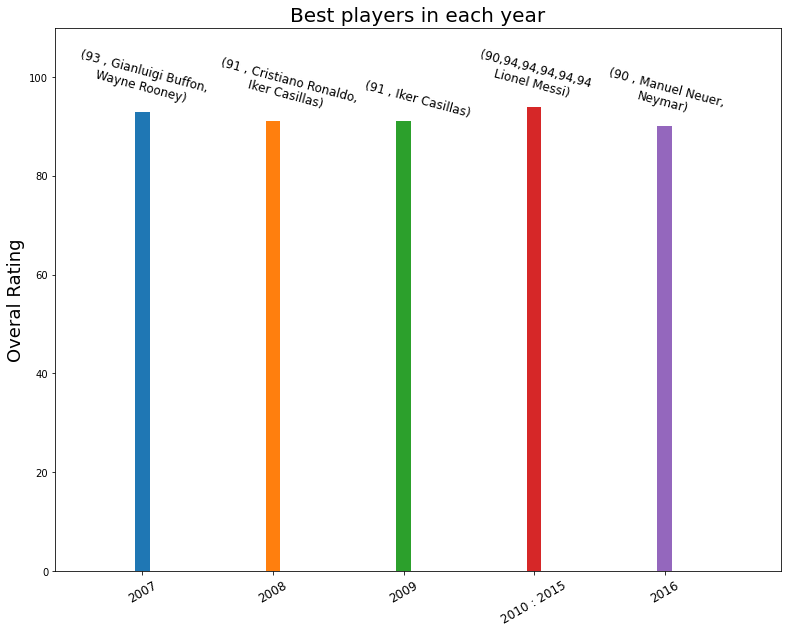

In [790]:
Hello = PlayerData.groupby('Year')['overall_rating'].max()
df = []

for i in range(len(Hello)):
    df.append(PlayerData.query(f'Year == {Hello.index[i]} and overall_rating == {Hello.values[i]}'))

plt.rcParams["figure.figsize"] = (13,10)

plt.bar([3], df[0].overall_rating, width=0.5)
plt.bar([7.5], df[1].overall_rating, width=0.5)
plt.bar([12], df[2].overall_rating, width=0.5)
plt.bar([16.5], df[4].overall_rating, width=0.5)
plt.bar([21], df[9].overall_rating, width=0.5)



plt.text(3 , df[0].overall_rating.iloc[0] + 0.5, '(' + str(int(df[0].overall_rating.iloc[0]))+ ' , ' + df[0].player_name.iloc[0] + ',' + '\n' + df[0].player_name.iloc[1] + ')' , ha='center', va='bottom', fontsize = 12, rotation='-15')
plt.text(8, df[1].overall_rating.iloc[0] + 0.5, '(' + str(int(df[1].overall_rating.iloc[0]))+ ' , ' + df[1].player_name.iloc[0] + ',' +'\n' + df[1].player_name.iloc[1] + ')', ha='center', va='bottom', fontsize = 12, rotation='-15' )
plt.text(12.5 , df[2].overall_rating.iloc[0] + 0.5, '(' + str(int(df[2].overall_rating.iloc[0]))+ ' , ' + df[2].player_name.iloc[0] + ')', ha='center', va='bottom', fontsize = 12, rotation='-15' )

plt.text(16.5, df[4].overall_rating.iloc[0] + 0.5, '(' + 
           str(int(df[3].overall_rating.iloc[0])) + ',' + str(int(df[4].overall_rating.iloc[0])) + ',' +
           str(int(df[5].overall_rating.iloc[0])) + ',' + str(int(df[6].overall_rating.iloc[0])) +',' +
           str(int(df[7].overall_rating.iloc[0])) +',' + str(int(df[8].overall_rating.iloc[0])) +'\n' +
           df[4].player_name.iloc[0] + ')', ha='center', va='bottom', fontsize = 12, rotation='-15' )

plt.text(21, df[9].overall_rating.iloc[0] + 0.5, '(' + str(int(df[9].overall_rating.iloc[0]))+ ' , ' + df[9].player_name.iloc[0] + ',' + '\n' + df[9].player_name.iloc[3] + ')', ha='center', va='bottom', fontsize = 12, rotation='-15' )

plt.xlim(0, 25)
plt.ylim(0, 110)
plt.xticks([3, 7.5, 12, 16.5, 21], ['2007', '2008', '2009', '2010 : 2015', '2016'], rotation=390, fontsize=12)
plt.ylabel('Overal Rating', fontsize=18)
plt.title('Best players in each year', fontsize=20)


We have noticed that Lionel Messi is the most superior player in the rankings over the years .. as he has the maximum \
rank in 2010 - 2011 - 2012 - 2013 - 2014 - 2015

> ### Now let's try to know what make these players be the best players in the Europe !

### 5) What features affects the overall rating?

We will try to find out which features are relevant to the overall rating.

In [792]:
PlayerData.corr()

,height,weight,Age,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,Year
height,1.000000,0.762176,0.072763,-0.004651,-0.035375,-0.473698,-0.320104,0.111904,-0.364106,-0.335513,-0.490154,-0.452054,-0.383592,-0.297312,-0.419595,-0.522063,-0.430250,-0.618819,-0.082576,-0.672173,-0.250186,-0.003158,-0.236377,0.519012,-0.361112,0.028850,0.001858,-0.374485,-0.383292,-0.270864,0.045017,0.025966,0.011284,0.315629,0.309854,0.191084,0.309086,0.313144,-0.024148
weight,0.762176,1.000000,0.176015,0.063945,-0.009193,-0.411654,-0.254560,0.097846,-0.326018,-0.261252,-0.432850,-0.387934,-0.314920,-0.269579,-0.370126,-0.462094,-0.385437,-0.556005,-0.019009,-0.555836,-0.170661,0.042218,-0.212975,0.563952,-0.288412,0.067334,-0.007965,-0.305190,-0.323229,-0.194014,0.016453,0.001163,-0.014010,0.311371,0.311752,0.211216,0.310953,0.312210,-0.049251
Age,0.072763,0.176015,1.000000,0.280227,-0.112404,0.040155,-0.001966,0.108898,0.018760,0.057619,-0.107338,0.023908,0.099141,0.094104,-0.034151,-0.239058,-0.233288,-0.165013,0.244293,-0.056543,0.059087,0.098851,-0.004513,0.244996,0.044200,0.217892,0.198847,0.049185,0.135997,0.155384,0.098271,0.089351,0.074244,0.125837,0.181975,0.296190,0.185273,0.174982,-0.292276
overall_rating,-0.004651,0.063945,0.280227,1.000000,0.765435,0.357320,0.330079,0.313324,0.458243,0.361739,0.354191,0.357566,0.349800,0.434525,0.443991,0.243998,0.253048,0.239963,0.771856,0.160211,0.428053,0.258978,0.325606,0.315684,0.392668,0.322782,0.249094,0.368978,0.431493,0.392715,0.132185,0.163986,0.128054,0.027675,0.006717,0.028799,0.008029,0.007804,0.176181
potential,-0.035375,-0.009193,-0.112404,0.765435,1.000000,0.277284,0.287838,0.206063,0.382538,0.301678,0.339978,0.296050,0.262842,0.343133,0.401803,0.338820,0.340698,0.293714,0.580991,0.202232,0.325459,0.174532,0.259432,0.122392,0.313059,0.162137,0.163292,0.326898,0.379278,0.315207,0.054094,0.082073,0.063284,-0.012283,0.005865,0.092299,0.004472,0.004936,-0.012256
crossing,-0.473698,-0.411654,0.040155,0.357320,0.277284,1.000000,0.576896,0.368956,0.790323,0.637527,0.809747,0.788924,0.708763,0.685649,0.807721,0.599439,0.579506,0.599561,0.384999,0.519778,0.656740,0.021270,0.565935,-0.072915,0.716515,0.324625,0.306446,0.684803,0.693978,0.574208,0.234886,0.285018,0.274673,-0.604567,-0.595646,-0.356728,-0.597742,-0.601696,0.095220
finishing,-0.320104,-0.254560,-0.001966,0.330079,0.287838,0.576896,1.000000,0.373459,0.580245,0.851482,0.784988,0.691082,0.633274,0.341121,0.720694,0.529355,0.509647,0.554396,0.354769,0.394978,0.727835,0.008948,0.347853,-0.054596,0.806895,0.044465,-0.152560,0.803687,0.652376,0.726234,-0.285416,-0.230453,-0.262144,-0.479370,-0.465135,-0.292349,-0.470758,-0.473302,0.067999
heading_accuracy,0.111904,0.097846,0.108898,0.313324,0.206063,0.368956,0.373459,1.000000,0.548435,0.391129,0.400803,0.320384,0.306013,0.362741,0.550956,0.198164,0.265430,0.068570,0.295601,0.077255,0.541365,0.286305,0.477830,0.493543,0.406003,0.577304,0.454187,0.408972,0.336472,0.431291,0.460831,0.480054,0.441134,-0.665600,-0.649145,-0.402865,-0.648981,-0.652494,0.049192
short_passing,-0.364106,-0.326018,0.018760,0.458243,0.382538,0.790323,0.580245,0.548435,1.000000,0.639995,0.788935,0.731948,0.693490,0.803073,0.890622,0.502893,0.490562,0.510650,0.460469,0.462617,0.722320,0.060067,0.611422,0.089782,0.729741,0.455426,0.425764,0.679014,0.766401,0.612511,0.349578,0.415427,0.380148,-0.694111,-0.689874,-0.422659,-0.691030,-0.693260,0.136688
volleys,-0.335513,-0.261252,0.057619,0.361739,0.301678,0.637527,0.851482,0.391129,0.639995,1.000000,0.784247,0.752410,0.682909,0.414520,0.749459,0.512931,0.493721,0.560021,0.397448,0.416578,0.746622,0.023143,0.382636,-0.037103,0.81

In [ ]:
columns = PlayerData.columns


for column  in columns:
    if column in ['player_name', 'date', 'Year', 'overall_rating']:
        continue
    PlayerData.plot.scatter(x=column, y='overall_rating',s = 0.5,  figsize=(8, 5), title = f'Relationship between overal rating & {column} ')


<a id='conclusions'></a>
## Conclusions

> 1. The number of matches varies from one league to another, but I dealt with it using the mean in my analysis.\
>
> 2. The greatest 3 leagues with the most number of goals per year were\
> * **Spain LIGA BBVA**
> * **England Premier League**
> * **Italy Serie A.**
>
> 3. As i mensioned in point 1, the number of matches differs from league to another so we get the\
Leagues with maximum average goals per game and they are: **Netherlands Eredivisie**, **Switzerland Super League** and **Germany 1. Bundesliga.**
>
> 4. The best teams which have a great avg goals per match ara:
> 
> * **FC Barcelona**
> * **Real Madrid CF**
> * **SL Benfica**
> * **FC Porto**
> * **Celtic**
> * **Rangers**
> * **FC Bayern Munich**
> * **Ajax','PSV','RSC Anderlecht'**
> 5. The common features of these teams are
> * **Good creation of passing**
> * **Good creation of crossing**
> * **Good shooting**
> * **Having a good defence in general.**
>
> 5. From the fifth point, we benefit from an advantage that helps teams win matches, which is a good defense in general. \
From the quote: **The best way to attack is to defend**, and analysis has proven that. As the top 10 winning teams care more about defense than other teams.\
and this attention increased over the years that reach peek in 2014.
>
> 6. The age curve of players is a normal distribution curve, and, the average age of the players is 35 years.
> 7. Lionel Messi dominated the list of the best player in Europe for five consecutive years from 2010 to 2015.
> 8. Goalkeepers with the highest rating over the years are 
> * **Gianluigi Buffon**
> * **Manuel Neuer**
> * **Iker Casillas**
> 9. The best players have common features, the most important of which are:
> * **potential**
> * **reactions**
> * **short_passing**
> * **ball_control**
> * **vision**
> * **shot_power** 



